DATA:

Price A: 200 - conversion; 23539 - no conversion

Price B: 182 - conversion; 22406 - no conversion


which price is better for conversion?



Observed difference is 0.0368%


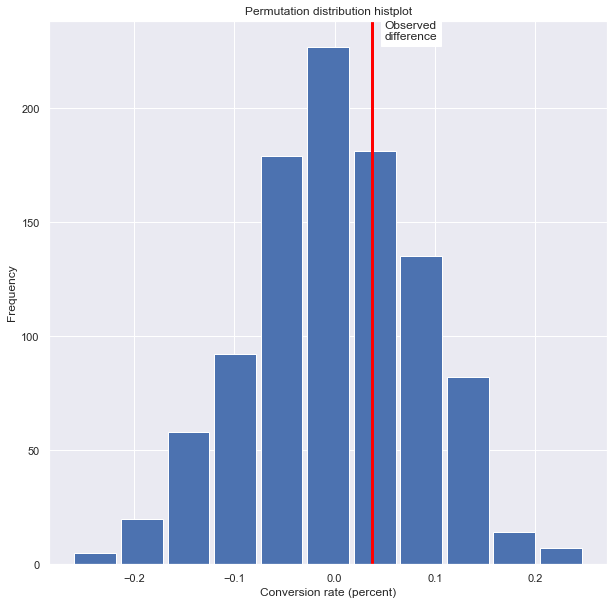

See the histogramm of 1000 resampled results: observed difference 0.0368% is wel within the range of chance variation.


In [39]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

nA = 23539+200
nB = 22406+182
obs_dif = 100*(200/nA-182/nB)
print(f'Observed difference is {obs_dif:.4f}%')
conversion = [0]*(23539+22406)
conversion.extend([1]*(200+182))
conversion = pd.Series(conversion)

def perm_func(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n))-idx_B
    return x.loc[idx_B].mean()-x.loc[idx_A].mean()

R=1000
perm_diffs = [100*perm_func(conversion, nA, nB) for _ in range(R)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_dif, color='red', lw=3)
ax.text(0.05, 230, 'Observed\ndifference', bbox = {'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')
plt.title('Permutation distribution histplot')
plt.show()

print(f'See the histogramm of {R} resampled results: observed difference {obs_dif:.4f}% is wel within the range of chance variation.')